# Reading the CSV File

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the csv file
df=pd.read_csv(r"dataset.csv")

In [ ]:
#viewing the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#viewing the no.of rows and columns in the dataframe
df.shape

(14999, 10)

In [ ]:
#viewing all the datatypes
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

# Data Preprocessing

In [ ]:
#all unique values of sales column
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [ ]:
#all unique values of salary column
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
#checking the total null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
#checking the duplicate values
df.duplicated().sum()

3008

In [ ]:
#removing the duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
#checking the duplicate values
df.duplicated().sum()

0

In [ ]:
#viewing the no.of rows and columns in the dataframe
df.shape

(11991, 10)

In [ ]:
#all unique values of Work_accident column
df.Work_accident.value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [ ]:
#all unique values of promotion_last_5years column
df.promotion_last_5years.value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

# Splitting the data with the target column and then into train , test and validation datasets

In [ ]:
#importing the required library
from sklearn.model_selection import train_test_split

In [ ]:
#here the target column is the left column
dftarget=df.left

In [ ]:
#getting the modeldataframe
df.drop('left',axis=1,inplace=True)

In [ ]:
#splitting the data into train and pre-test datasets
x_train,pre_x_train,y_train,pre_y_test=train_test_split(df,dftarget,test_size=0.3,shuffle=True)

In [ ]:
#splitting the pre-test dataset in to validation and test datasets
x_val,x_test,y_val,y_test=train_test_split(pre_x_train,pre_y_test,test_size=0.5,shuffle=True)

# EDA

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


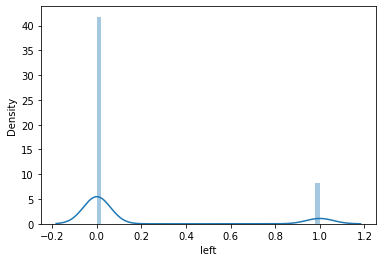

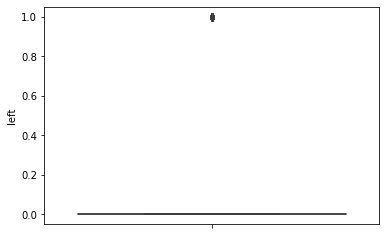

In [ ]:
#checking for outliers in the target column
sns.distplot(y_train)
plt.show()
print()
sns.boxplot(y=y_train)
plt.show()

# Feature Engineering

In [ ]:
#importing the required libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#label encode the salary column
lsal=LabelEncoder()
lsal.fit(x_train.salary)
x_train['salary_encode']=lsal.transform(x_train['salary'])
x_val['salary_encode']=lsal.transform(x_val['salary'])
x_test['salary_encode']=lsal.transform(x_test['salary'])

<ipython-input-26-6471f1fdd880>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['salary_encode']=lsal.transform(x_train['salary'])
<ipython-input-26-6471f1fdd880>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['salary_encode']=lsal.transform(x_val['salary'])
<ipython-input-26-6471f1fdd880>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
#label encode the sales column
lsale=LabelEncoder()
lsale.fit(x_train.sales)
x_train['sales_encode']=lsale.transform(x_train['sales'])
x_val['sales_encode']=lsale.transform(x_val['sales'])
x_test['sales_encode']=lsale.transform(x_test['sales'])

<ipython-input-27-2c92f3878de0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['sales_encode']=lsale.transform(x_train['sales'])
<ipython-input-27-2c92f3878de0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['sales_encode']=lsale.transform(x_val['sales'])
<ipython-input-27-2c92f3878de0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
#function to drop columns
def dropcols(col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)
    return traindf,valdf ,testdf

In [ ]:
#dropping the salary and sales columns
x_train,x_val,x_test=dropcols('sales')
x_train,x_val,x_test=dropcols('salary')

E:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#checking the quasi-constant columns
sel=VarianceThreshold(threshold=0.05)
sel.fit(x_train)
quarsi_constants=[x for x in x_train.columns if x not in x_train.columns[sel.get_support()]]
quarsi_constants

['last_evaluation', 'promotion_last_5years']

In [ ]:
#removing the quasi-constant columns
x_train,x_val,x_test=dropcols(quarsi_constants)

E:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

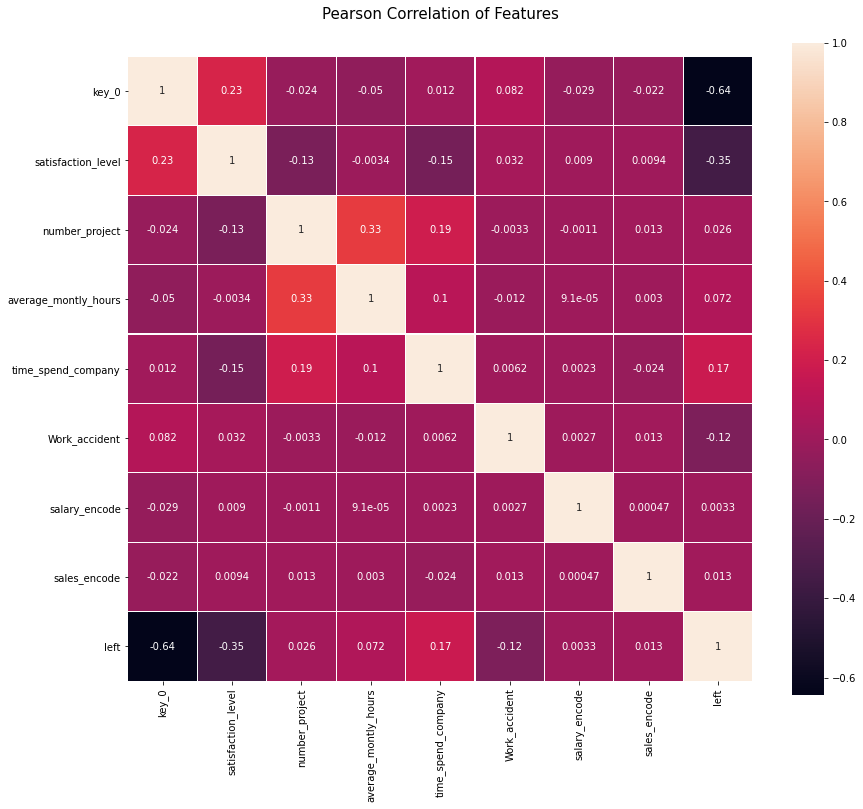

In [ ]:
# Displaying the Heatmap using the co-relation coefficient
cormat=x_train.merge(y_train , on = x_train.index ).corr()
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cormat,linewidths=0.1,vmax=1,square=True, linecolor='white', annot=True)

In [ ]:
#The Final features fetched after feature selection
features=['number_project','average_montly_hours','time_spend_company']

# Model Building

In [ ]:
#importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
import pickle

In [ ]:
#removing the non required columns
cols=list(set(list(x_train.columns))-set(features))
x_train,x_val,x_test=dropcols(cols)

In [ ]:
#reseting the indexes
x_train=x_train.reset_index(drop=True)
x_val=x_val.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)

In [ ]:
#model building using KNN algorithm and finding the rmse and mse values
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)
model1_predict=model1.predict(x_val)
model1_rmse=mean_squared_error(y_val, model1_predict, squared=False)
model1_mse=mean_squared_error(y_val, model1_predict, squared=True)

In [ ]:
#model building using Logistic Regression algorithm and finding the rmse and mse values
model2=LogisticRegression()
model2.fit(x_train,y_train)
model2_predict=model2.predict(x_val)
model2_rmse=mean_squared_error(y_val, model2_predict, squared=False)
model2_mse=mean_squared_error(y_val, model2_predict, squared=True)

In [ ]:
#model building using Decision Tree algorithm and finding the rmse and mse values
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
model3_predict=model3.predict(x_val)
model3_rmse=mean_squared_error(y_val, model3_predict, squared=False)
model3_mse=mean_squared_error(y_val, model3_predict, squared=True)

In [ ]:
#model building using SVM algorithm and finding the rmse and mse values
model4=SVC()
model4.fit(x_train,y_train)
model4_predict=model4.predict(x_val)
model4_rmse=mean_squared_error(y_val, model4_predict, squared=False)
model4_mse=mean_squared_error(y_val, model4_predict, squared=True)

In [ ]:
#model building using Random Forest algorithm and finding the rmse and mse values
model5=RandomForestClassifier()
model5.fit(x_train,y_train)
model5_predict=model5.predict(x_val)
model5_rmse=mean_squared_error(y_val, model5_predict, squared=False)
model5_mse=mean_squared_error(y_val, model5_predict, squared=True)

In [ ]:
#model building using XGBoost algorithm and finding the rmse and mse values
model6=XGBClassifier()
model6.fit(x_train,y_train)
model6_predict=model6.predict(x_val)
model6_rmse=mean_squared_error(y_val, model6_predict, squared=False)
model6_mse=mean_squared_error(y_val, model6_predict, squared=True)

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:02:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
#comparing all the models
data={'model_name':['Logistic Regression model','SVC model','Decision Tree Classifier model','K-Nearest Neighbor model','Random Forest Classifier model','XGBoost model'],
      'MSE':[model2_mse,model4_mse,model3_mse,model1_mse,model5_mse,model6_mse],
      'RMSE':[model2_rmse,model4_rmse,model3_rmse,model1_rmse,model5_rmse,model6_rmse]}
modelcom=pd.DataFrame(data)

In [ ]:
#view the modelcom dataframe
modelcom.head(10)

,model_name,MSE,RMSE
0,Logistic Regression model,0.175653,0.419110
1,SVC model,0.163424,0.404257
2,Decision Tree Classifier model,0.046137,0.214795
3,K-Nearest Neighbor model,0.046693,0.216085
4,Random Forest Classifier model,0.045025,0.212191
5,XGBoost model,0.041690,0.204181


In [ ]:
#saving the model
filename = 'model.h5'
pickle.dump(model6, open(filename, 'wb'))

In [ ]:
#Model testing
test_predict=model6.predict(x_test)
model_rmse=mean_squared_error(y_test, test_predict, squared=False)
model_mse=mean_squared_error(y_test, test_predict, squared=True)
print(f"The MSE value on the test data is {model_mse} and RMSE value is {model_rmse}")

The MSE value on the test data is 0.05113952195664258 and RMSE value is 0.2261404916343877


# Prediction on the given set

In [ ]:
#predict on user values
print(f"Plese input the given values and predict whether the employee will leave or retain in the upcoming year\n")
number_project=eval(input("Enter the number of projects done by the employee\n"))
average_montly_hours=eval(input("Enter the average monthly hours spend by the employee\n"))
time_spend_company=eval(input("Enter the time spend by the employee\n"))
dfpredict={'number_project':[number_project],'average_montly_hours':[average_montly_hours],'time_spend_company':[time_spend_company]}
prediction=pd.DataFrame.from_dict(dfpredict)
value_predict=model6.predict(prediction)
if(value_predict[0]==0):
    print("\nBased on the given data the employee will retain in the company.")
else:
    print("\nBased on the given data the employee will leave the company.")

Plese input the given values and predict whether the employee will leave or retain in the upcoming year

Enter the number of projects done by the employee
5
Enter the average monthly hours spend by the employee
200
Enter the time spend by the employee
4

Based on the given data the employee will retain in the company.
